# TRABAJO ANÁLISIS REDES SOCIALES

In [237]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random as rnd
%matplotlib inline

# Objetivo

El objetivo de esta práctica es aplicar el conocimiento sobre Análisis de Redes Complejas adquirido durante estas semanas del curso. Se persigue por encima de todo evaluar el grado de comprensión de las diferentes métricas estudiadas y su aplicación a un caso real, más que la ejecución sistemática de una batería indiscriminada de estadísticos de redes.


Los objetivos específicos del trabajo son:

Formalizar una red social, correspondiente a cualquier fenómeno social real o de ficción (libro, película, serie tv, juego, …). Cualquier fuente de información utilizada para crear la red debe ser citada en el trabajo, e.g. The Marvel Social Network Networks of super heroes, Cesc Rosselló, Ricardo Alberich, and Joe Miro, the University of the Balearic Islands,    https://gephi.org/datasets/hero-social-network.gephi 

Analizar las principales métricas de la red e interpretar sus valores
 

## 1. Descripción del problema

En este trabajo se va a analizar una red de relaciones subjetivas entre los miembros de la élite financiera francesa en 1990. Los nodos son individuos y los límites dirigidos representan una evaluación subjetiva por i de j en términos de amistad. El soporte documental para dicha red esta definido en:
Journal Article Friendship Among the French Financial Elite (https://www.jstor.org/stable/2096384?seq=1#page_scan_tab_contents)
De donde se ha extraido la información, configurando el dataSet contenido en la siguiente referencia:
http://moreno.ss.uci.edu/data.html#ffe
"BACKGROUND In 1990 Kadushin collected data from 127 members of the French financial elite. He used various criteria to determine the top 28 and recorded their who-to-whom responses to questions about who was influencential, who were members of the elite and who were friends. He also recorded a large amount of information on their individual backgrounds and characteristics."
El enfoque de este análisis es doble, por una parte analizar, en una red real las principales características de la misma, describiendo la misma. Adicionalmente, en el dataset se incorporan metadatos del nodo incluyen varios atributos medidos de los individuos (http://moreno.ss.uci.edu/ffe_trait.dat). Estos metadatos serán utilizados para la configuración de diferentes comunidades, analizando el comportamiento de las mismas y a su vez comparandolo con la mejor comunidad encontrada aplicando un algoritmo de detecction de comunidades que no tenga en cuenta dichos metadatos.
Adicionalmente, esta red presenta la ventaja de ser una red relativamente pequeña, facilitando su representación y entender su comportamiento. No obstante, todas las operaciones realizadas serían perfectamente aplicables a una red de numerosos nodos.

## 2. Formación de la red

Tal y como se ha señalado anteriormente, los datos cuantitativos de la red se han obtenido a través de http://moreno.ss.uci.edu/ffe.dat, no obstante, en dicha referencia se incluyen tres posibles alternativas:
LEVEL LABELS:
"WHO INFLUENCES YOU"
"WHO IS IN THE ELITE"
"WHO ARE YOUR FRIENDS".

Dentro de las mismas, aunque todas tienen su interés se ha seleccionado la última de ellas, es decir la que señala una relación de amistad (arcos) entre personas (nodos). Se ha definido por los autores dicha relación de amistad como simétrica.
Uno de los problemas encontrados ha sido la importación de los datos, ya que las tres matrices se encontraban en un único fichero y sin el formato adecuado. Por tanto, el procedimiento más sencillo ha sido trasladar los datos de estudio a otro fichero, realizando la sustución (automática) de espacios por comas y configurar una matriz de adyacencia (que se presenta a continuación). A partir de esta matriz de adyacencia, existen métodos propios de Networkx para crear el Grafo correspondiente a la misma.

In [238]:
Datos=[[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1],
[0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0],
[1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0],
[0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0],
[0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1],
[0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
[0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0],
[0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0]]
Datosnp=np.matrix(Datos)

In [239]:
G=nx.from_numpy_matrix(Datosnp)

In [240]:
G.graph['nombre']='KADUSHIN--THE FRENCH FINANCIAL ELITE'
G.graph['tipo']='no-dirigida'

## 3. Características Generales de la Red 

### 3.1. Características Generales de la Red

In [241]:
print('Los atributos de la red son: ', G.graph)
print('El numero de nodos es: ',G.number_of_nodes())
print('El numero de enlaces es: ',G.number_of_edges())
print('El grado medio es: ',(G.number_of_edges())*2/(G.number_of_nodes()))

Los atributos de la red son:  {'nombre': 'KADUSHIN--THE FRENCH FINANCIAL ELITE', 'tipo': 'no-dirigida'}
El numero de nodos es:  28
El numero de enlaces es:  66
El grado medio es:  4.714285714285714


Se observa que es una red pequeña (28 nodos y 66 enlaces y relativamente dispersa.

### 3.2. Visualización de la red

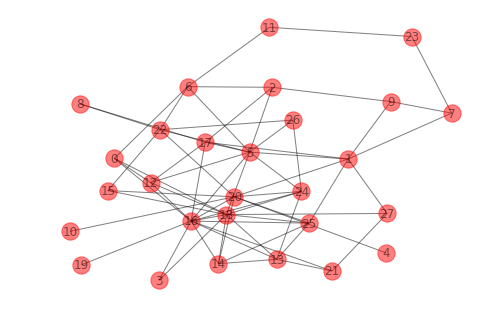

In [242]:
#A continuación se incluye una visualización general de la red, en la cual no se ha incluido ninguna
#información adicional
pos=nx.layout.kamada_kawai_layout(G)
nx.draw(G,pos=pos,with_labels=True,alpha=0.5)

Por una parte, debido a que esta red es pequeña, la misma se puede visualizar de una manera clara, permitiendo ya a simple vista establecer ciertas características de la red. Por un lado, se observa que hay un componente único para toda la red. Adicionalmente se observa que hay nodos que tienen numerosos enlaces (grado) frente a otros que tienen un grado muy bajo.

## 4. Analisis de la Centralidad

Se van a realizar primeramente un cálculo y representación de las principales medidas de centralidad de esta red. Posteriormente a dicho cálculo y representación se realizará un comentario señalando qué medida se considera más apropiada para medir la centralidad de la red y las principales conclusiones derivadas de dichos cálculos de centralidad.

In [243]:
# Calculamos las principales medidas de centralidad que posteriormente comentaremos
GDegree=np.array([x for x in nx.centrality.degree_centrality(G).values()])
GPagerank=np.array([x for x in nx.pagerank(G).values()])
GPagerankNodes=[x for x in nx.pagerank(G)]
GCloseness=np.array([x for x in nx.centrality.closeness_centrality(G).values()])
Gbetweenness=np.array([x for x in nx.centrality.betweenness_centrality(G).values()])

### 4.1. Degree

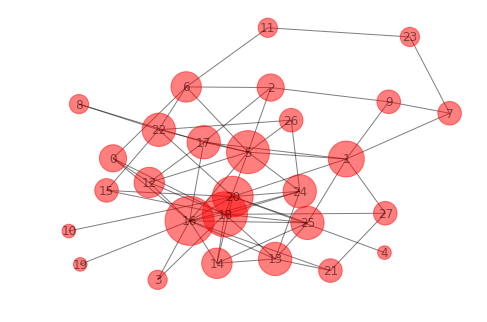

In [244]:
nx.draw(G,pos,with_labels=True,node_color="r",alpha=0.5,node_size=GDegree*5000)

### 4.2. PageRank

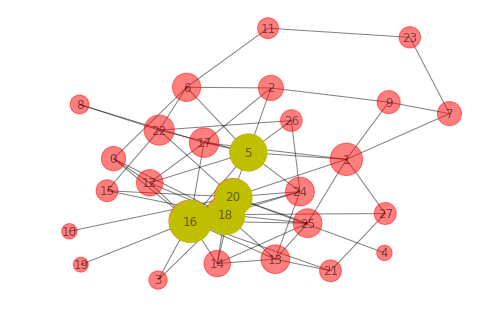

In [245]:
#No se analiza Eigenvector centrality ya que se entiende que PageRank permite visualizar mejor las características
# específicas de centralilidad de esta red.
mayorpagerank=[]
for i,n in zip(range(len(G.nodes())),G.nodes()):
    mayorpagerank.append([n,GPagerank[i]])
mayorpagerank.sort(key=lambda mayorpagerank: mayorpagerank[1],reverse=True)
nx.draw(G,pos,with_labels=True,node_color="r",alpha=0.5,node_size=GPagerank*20000)
nx.draw_networkx_nodes(G,pos,nodelist=[mayorpagerank[0][0]],node_color='y',node_size=mayorpagerank[0][1]*20000)
nx.draw_networkx_nodes(G,pos,nodelist=[mayorpagerank[1][0]],node_color='y',node_size=mayorpagerank[1][1]*20000)
nx.draw_networkx_nodes(G,pos,nodelist=[mayorpagerank[2][0]],node_color='y',node_size=mayorpagerank[2][1]*20000)
nx.draw_networkx_nodes(G,pos,nodelist=[mayorpagerank[3][0]],node_color='y',node_size=mayorpagerank[3][1]*20000)

### 4.3. Betweenness

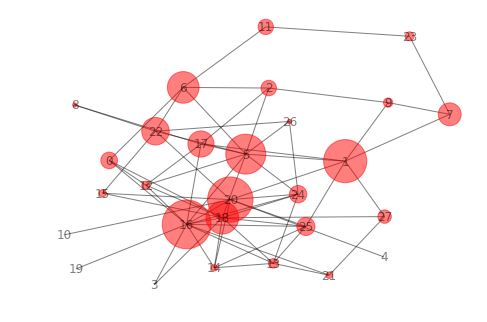

In [246]:
nx.draw(G,pos,with_labels=True,node_color="r",alpha=0.5,node_size=Gbetweenness*10000)

### 4.4. Closeness

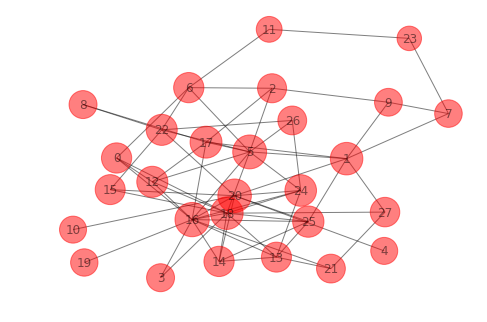

In [247]:
nx.draw(G,pos,with_labels=True,node_color="r",alpha=0.5,node_size=GCloseness*2000)

### 4.5. Conclusiones derivadas del análisis de centralidad de la red

Para este caso, se considera que la medida de centralidad de PageRank es la que mejor analiza la centralidad de la Red, ya que es muy apropiada para la medición de las relaciones, la influencia,... En este caso, se entiende que la principal cuestión es ¿Quién esta mejor conectado a los mejores conectados? Otra medida como Degree, capta peor esta característica (aunque la aproxima). Como segundo aspecto de interes también se debe considerar la medida de Betweenness, ya que determinará qué personas constituyen los "puentes" entre las distintas personas. Aquellos nodos (personas) con elevado Betweenness serán los que más información transmitan entre los diferentes nodos y son claves para poner en contacto cuando alguien de "una parte de la red" quiera ponerse en contacto con alguien de "la otra parte de la red".
Centrandonos en las características específicas de la red podemos señalar:


#### 4.5.1. PageRank

Se observan grandes diferencia entre el PageRank de los diferentes nodos, lo que determina que existen grandes diferencias entre las influencias que los mismos pueden ejercer. Se observa que existen 4 nodos que son clave y que se podría decir que forman un círculo de poder o influencia ya que tienen un PageRank sobresaliente frente al resto. Estos nodos se han marcado con color amarillo

#### 4.5.2. Betweenness
Se observa que en este caso, los nodos que tenían un mayor PageRank, también tienen un mayor Betweenness. Es decir, nuestro "circulo de poder" también es un circulo por el que pasan las comunicaciones, ... hay una pequeña diferencia, ya que el nodo 18 que pertenecia a nuestros 4 nodos de mayor PageRank, no tiene un Betweenness sobresaliente, y sin embargo, el nodo 1 (y en menor medida el 6) son muy importantes como puente de comunicación.
Es decir, hay un núcleo de influencia de 4 nodos y otro nodo, que aunque no tiene tanta influencia, es clave en las comunicaciones.

#### 4.5.3. Degree
Tal y como se ha comentado anteriormente, la información que proporciona esta medida se superpone a la de PageRank, aunque no es tan rica en cuanto al análisis. Por tanto, nos quedaremos con las conclusiones obtenidas a partir de la medida de PageRank.

#### 4.5.4. Closeness
Por las características de la red y además revisando los valores obtenidos, no se pueden extraer conclusiones relevantes de esta medida de centralidad que no es en absoluto la más apropiada para este análisis.

## 5. Propiedades Macroscópicas

### 5.1. Componentes de la red

In [248]:
print('El número de componentes de la red es :',nx.number_connected_components(G))

El número de componentes de la red es : 1


Tal y como se había apreciado visualmente, existe un único componente en la red, que es en si mismo un componente gigante.

### 5.2. Distancia Geodésica Media y Propiedad Small World

In [249]:
print('La distancia geodesica media de la red es:',nx.average_shortest_path_length(G))

La distancia geodesica media de la red es: 2.3015873015873014


Como podemos observar, la distancia geodésica media para esta red es 2.3, teniendo en cuanta que el número de nodos es 28, podemos señalar que cumple la propiedad de Small World.

### 5.3. Clustering de la red

In [250]:
print('El coeficiente de clustering de la red es:',np.average(list(nx.clustering(G).values())))

El coeficiente de clustering de la red es: 0.3169180026322883


Se observa un coeficiente de clustering signficativamente alto, pudiendose por tanto señalar que nos encontramos ante una red relativamente robusta, en la que se forman circulos de amistad y confianza. Esto no es de extrañar en este tipo de entornos en el cual es muy significativa los apoyos y la influencia. 

## 6. Cálculo de la Modularidad para comunidades establecidas a través de los Metadatos

Como se señalaba en la introducción, adicionalmente se dispone de metadatos que recogen diferentes características de los nodos (http://moreno.ss.uci.edu/ffe_trait.dat). Se va a utilizar estos metadatos para, definir ciertas comunidades a través de dichos metadatos, y ver la modularidad de dichas comunidades. De los numerosos metadatos se ha seleccionado comunidades en función de los siguientes aspectos:
1. Religión (PartReligion) del individuo.
2. Pertenencia a la Masonería (https://es.wikipedia.org/wiki/Francmasoner%C3%ADa)
3. Estudios realizados en la Ecole Nationale d'Administration (ENA) (https://www.ena.fr/)
4. Estudios realizados en la Ecole polytechnique (http://www.polytechnique.edu/)
Realmente existian otras características que podrían haber sido seleccionadas, para las que el análisis sería idéntico. Otro aspecto es que la categorización por estudios hubiera resultado más conveniente realizarla dividiendo en comunidades por École, no obstante, tal y como están descritos los datos, esto no se puede realizar. No obstante, a priori la Grande École en Francia parece un aspecto a priori muy característico del individuo y se quería realizar dicho análisis, así que se ha analizado (en comunidades binarias) para las dos Grande École a priori más importantes Ecole polytechnique y ENA (a priori se considera que Ecole polytechnique es más importante (más prestigio) que ENA.
Notar también que se entiende que los estudios son realizados a lo largo de la vida y en los diferentes programas, ya que hay individuos que han estudiado en varias Grande École (se entiende que habrán realizado programas "profesionales" posteriormente).

In [251]:
#Definición de comunidades
PartReligion={}
PartMason={}
PartENA={}
PartPolytech={}

PartReligion["2"]=[1,3,8,9,14,15,16,20,23,24,25,26]
PartReligion["3"]=[4,10,12]
PartReligion["4"]=[0,2,5,6,7,11,13,17,18,19,21,22,27]

PartMason["0"]=[2,3,6,8,9,10,12,13,14,15,16,17,20,21,22,25,26]
PartMason["1"]=[0,1,4,5,7,11,18,19,23,24,27]

PartENA["1"]=[0,3,4,5,10,12,13,14,15,16,18,19,20,22,24,25,26]
PartENA["2"]=[1,2,6,7,8,9,11,17,21,23,27]

PartPolytech["1"]=[0,1,17,20,21,23,27]
PartPolytech["2"]=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,22,24,25,26]

In [252]:
#Función del cálculo de modularidad
def calculaModularidad(G,part):
    totalenlaces=len(nx.edges(G))
    totalextremos=2*totalenlaces
    modularidad=0
    # Para cada una de las particiones aplicamos la fórmula de cálculo
    for i in part:
        enlacesparticion=0
        for j in nx.edges(G):
            if j[0] in part[i] and j[1] in part[i]:
                enlacesparticion=enlacesparticion+1
        gradoparticion=0
        for j in part[i]:
            gradoparticion=gradoparticion+G.degree(j)
        modularidad=modularidad+((enlacesparticion/totalenlaces)-(gradoparticion/totalextremos)**2)
    return modularidad

In [253]:
print('La modularidad de la partición Religión es: ', calculaModularidad(G,PartReligion))
print('La modularidad de la partición Masonería es: ', calculaModularidad(G,PartMason))
print('La modularidad de la partición ENA es: ', calculaModularidad(G,PartENA))
print('La modularidad de la partición Polytech es: ', calculaModularidad(G,PartPolytech))

La modularidad de la partición Religión es:  -0.01205234159779615
La modularidad de la partición Masonería es:  0.0160697887970615
La modularidad de la partición ENA es:  0.21028466483011932
La modularidad de la partición Polytech es:  -0.01147842056932967


Se observa que la modularidad de la partición ENA, destaca sobre el resto de posibles particiones, quizás no es un número muy muy elevado pero se entiende como suficientemente significativo.
Realmente, habiendo estudiado en Francia, no sorprende que uno de los elementos más definitorios de las relaciones de amistad (y lo que ello conlleva, influencia) sea la Grande École de procedencia. Es decir, se puede extraer como conclusión que, según este análisis, las relaciones de la élite financiera francesa vienen ante todo condicionadas por esta característica. Revisando los datos PartENA["1"]=[0,3,4,5,10,12,13,14,15,16,18,19,20,22,24,25,26] contiene los nodos con mayor centralidad PR (5,18,16,20).
No obstante, es sorprendente que la Grande École no sea Polytech sino ENA, que a priori tiene menor prestigio (aunque también muy alto), y que está focalizada en Administración Pública.
En todo caso, viendo este análisis, el siguiente análisis ha realizar (para el cual no tenemos datos) hubiera sido, realizar particiones por Escuela y comprobar dicha modularidad (que probablemente si todo funcionara correctamente sería superior ya que en este análisis se esta incluyendo dentro del mismo grupo a todos los que "no" han ido a ENA que no tienen porque tener relación). Adicionalmente, se podría ver (cruzando con centralidad PR), que comunidad tiene más poder (ya con lo que se ha hecho se puede decir), que esta claro que son los ex-alumnos de ENA.

## 7. División en Comunidades encontrando las mejores Comunidades

A continuación se va a utilizar el algoritmo de GN para dividir la muestra en comunidades(sin utilizar los metadatos anteriores).

In [254]:
# Función auxiliar, para un grafo devuelve comunidades que no estan unidas
def divisionComunidades(GCopia):
    # 
    GCopia2=GCopia.copy()
    Nodos=list(GCopia2.nodes())
    # Creamos una primera comunidad con el primer nodo
    comunidades={}
    comunidades[Nodos[0]]=[Nodos[0]]
    Nodos.pop(0)
    # Para cada uno de los nodos se ve si está unido a una comunidad existente. Si es así se añade a dicha
    # comunidad, en caso contrario se crea una comunidad nueva
    while len(Nodos)>0:
        incluido=0
        for i in comunidades:
            camino=nx.has_path(GCopia2,Nodos[0],i)
            if camino:
                comunidades[i].append(Nodos[0])
                incluido=1
                break
        if not incluido:
            comunidades[Nodos[0]]=[Nodos[0]]
        Nodos.pop(0)   
    return comunidades
 

def deteccionComunidades(G):
    GCopia=G.copy()
    # Se parte de la división en comunidades sin suprimir ningún enlace
    mejorescomunidades=divisionComunidades(GCopia)
        # Se realiza sobre el grafo original
    mejormodularidad=calculaModularidad(G,mejorescomunidades)
    # Se van eliminando enlaces (el de mayor betweennsess)
    # Se evalua la modularidad de dicha partición. 
    while len(GCopia.edges())>1:
        Gbet=nx.edge_betweenness_centrality(GCopia)
        maxbet=0
        edge=[]
        for i in Gbet.keys():
            if Gbet[i]>maxbet:
                maxbet=Gbet[i]
                edge=i
        GCopia.remove_edge(*edge)
        comunidadesanalizadas=divisionComunidades(GCopia)
        #Se realiza sobre el grafo original
        modularidadanalizada=calculaModularidad(G,comunidadesanalizadas)
        #Si es la mejor encontrada se almacena como mejor solucion
        if modularidadanalizada>mejormodularidad:
            mejormodularidad=modularidadanalizada
            mejorescomunidades=comunidadesanalizadas
    print('La mejor modularidad es:', mejormodularidad)
    print('Para las siguientes comunidades:', mejorescomunidades)
    return mejorescomunidades  
print('ANALISIS RED')
deteccionComunidades(G)
print("")

ANALISIS RED
La mejor modularidad es: 0.2479338842975207
Para las siguientes comunidades: {0: [0, 3, 12, 13, 14, 16, 18, 20, 24, 25], 1: [1, 21, 27], 2: [2, 5, 6, 8, 15, 17, 22, 26], 4: [4], 7: [7, 11, 23], 9: [9], 10: [10], 19: [19]}



Se observa que la mejor partición encontrada tiene un valor de 0.24 que no difiere mucho del 0.21 encontrado anteriormente, de hecho hasta se puede apreciar que la comunidad principal encontrada tiene gran similitud:

0: [0, 3, 12, 13, 14, 16, 18, 20, 24, 25]


PartENA["1"]=[0,3,4,5,10,12,13,14,15,16,18,19,20,22,24,25,26]

Es decir, partiendo de la premisa que el algoritmo de GN esta encontrando la mejor división en comunidades (realmente no nos asegura la mejor solución, pero vamos a suponer que casi lo hace), realmente la característica ENA es la que lo define.

## 8. Distribución de Grado

A continuación se va a representar la distribución de grado, primero representando en escala lineal, posteriormente en escala logaritmica, que es más representativa calculandose el coeficiente para la distribución de grado correspondiente.

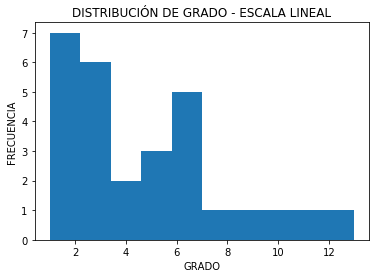

In [255]:
GDegreeNN=np.array([x[1] for x in G.degree()])#Degree (no normalizado)
plt.hist(GDegreeNN,normed=False);
plt.xlabel('GRADO');
plt.ylabel('FRECUENCIA');
plt.title('DISTRIBUCIÓN DE GRADO - ESCALA LINEAL');

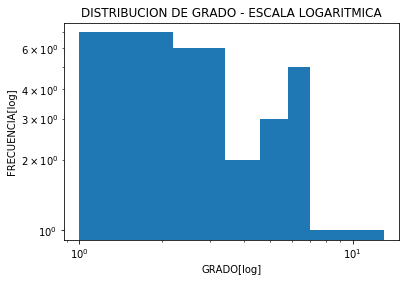

In [256]:
plt.hist(GDegreeNN,normed=False);
plt.xlabel('GRADO[log]');
plt.ylabel('FRECUENCIA[log]');
plt.title('DISTRIBUCION DE GRADO - ESCALA LOGARITMICA');
plt.xscale('log');
plt.yscale('log');

In [257]:
# Ordenamos de forma decreciente los grados
degreedecreciente=np.sort(GDegreeNN)[::-1]
# obtenemos una distribucion haciendo dividiendo cada valor del ranking por el numero todal de nodos
distribucionacumulada=np.array([],dtype=float)
ranking=np.array([],dtype=float)
i=1
tamano=len(degreedecreciente)
for j in degreedecreciente:
    ranking = np.append(ranking,i)
    distribucionacumulada = np.append(distribucionacumulada,(i/tamano))
    i=i+1

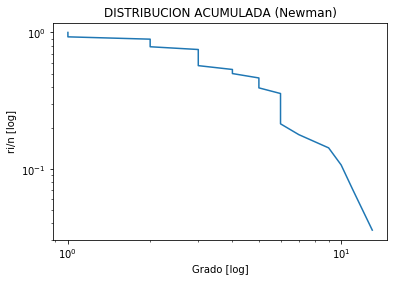

In [258]:
plt.plot(degreedecreciente, distribucionacumulada)
plt.xlabel('Grado [log]');
plt.ylabel('ri/n [log]');
plt.title('DISTRIBUCION ACUMULADA (Newman)');
plt.xscale('log');
plt.yscale('log');

In [259]:
# Ajuste de una recta a los valores
logdegreeedecreciente=np.log10(degreedecreciente)
logdistribucionacumulada=np.log10(distribucionacumulada)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(logdegreeedecreciente,logdistribucionacumulada)
print('slope: %.4f, correl: %.4f, p-valor: %.4f' %(slope1,r_value1,p_value1))
print('Notar que en este caso slope corresponde a pendiente=-α+1 y por tanto el valor de la pendiente sería:')
print(-slope1+1)

slope: -1.0759, correl: -0.8942, p-valor: 0.0000
Notar que en este caso slope corresponde a pendiente=-α+1 y por tanto el valor de la pendiente sería:
2.075883326757686


Se observa que (más o menos) ajusta con una distribución potencial. Hay que destacar que tenemos una red únicamente de 28 nodos, y por lo tanto, este tipo de representaciones no son tan "visibles" como en redes con más nodos en las cuales existen más datos (para la realización de regresiones, que los hubs se definan más, ...). En todo caso, si que se observa la presencia de Hubs, destacando que en este caso la pendiente es 2,07

## 9. Robustez frente a ataques

### 9.1. Robustez a ataques dirigidos

A continuación se comprobará la robustez de la red frente a ataques dirigidos progresivamente al nodo de mayor grado.

In [260]:
GCopy=G.copy()
N=len(GCopy.nodes)
nodos=GCopy.nodes
valoresconectividad=[]
for j in range(N-1):
    tamanoactual=len(nodos)
    degree=np.array([x[1] for x in GCopy.degree()]) # Array de grado de los nodos
    maxdegree=degree.max()
    # Buscamos el nodo de mayor grado y lo eliminamos
    for k in GCopy.nodes:
        if GCopy.degree(k)==maxdegree:
            nodoaeliminar=k
            break
    GCopy.remove_node(nodoaeliminar)
    largest_cc = max(nx.connected_components(GCopy), key=len)
    # Almacenamos la conectividad
    valoresconectividad.append(len(largest_cc))

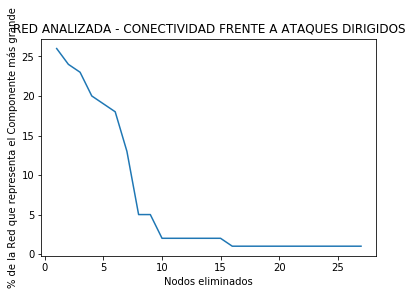

In [261]:
x=np.arange(1,N)
y = np.asarray(valoresconectividad)
plt.plot(x, y)
plt.xlabel('Nodos eliminados');
plt.ylabel('% de la Red que representa el Componente más grande');
plt.title('RED ANALIZADA - CONECTIVIDAD FRENTE A ATAQUES DIRIGIDOS'); 


### 9.2. Robustez a ataques aleatorios

A continuación se comprobará la robustez de la red frente a ataques dirigidos progresivamente al nodo de mayor grado.

In [262]:
GCopy2=G.copy()
N=len(GCopy2.nodes)
valoresconectividad2=[]

for j in range((N-1)):
    nodos=list(GCopy2.nodes)
    #eliminamos un nodo y por tanto sus enlaces
    tamanoactual=len(nodos)
    nodoaeliminar=np.random.randint(tamanoactual)
    GCopy2.remove_node(nodos[nodoaeliminar])
    # Almacenamos la conectividad
    largest_cc = max(nx.connected_components(GCopy2), key=len)
    valoresconectividad2.append(len(largest_cc))

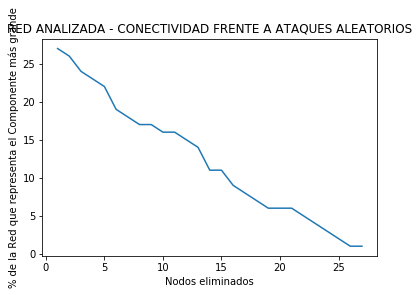

In [263]:
x=np.arange(1,N)
y = np.asarray(valoresconectividad2)
plt.plot(x, y)
plt.xlabel('Nodos eliminados');
plt.ylabel('% de la Red que representa el Componente más grande');
plt.title('RED ANALIZADA - CONECTIVIDAD FRENTE A ATAQUES ALEATORIOS');   

Vemos que de este análisis se aprecia que la red es (debido a la presencia de Hubs) muy sensible a ataques dirigidos. En este caso, evidentemente la interpretación de "eliminación" de nodos, no tiene mucho sentido. Tampoco es el aspecto más crítico si la misma esta totalmente conectada o no. En todo caso, si que se desprende (o al menos confirma desde otro punto de vista) algo que ya se había señalado anteriormente, hay ciertos nodos (un número pequeño) que son críticos para esta red, y también desde este punto de vista, si desaparecen, esta red se "desconecta". Se observa claramente que a partir de la desconexión del sexto nodo, el tamaño del componente más grande decrece enormemente. Desde el punto de vista práctico, la aplicación es que, "controlando o influyendo" a estos nodos básicamente se controla la red (flujos de información, influencias, ...), estos son los ya comentados (16,18,5,20,1) que además en su gran mayoría (los 4 primeros), tienen la característica "ENA".

## 10. Conclusiones

Se ha analizado una red de relaciones subjetivas entre los miembros de la élite financiera francesa en 1990. Los nodos son individuos y los límites dirigidos representan una evaluación subjetiva por i de j en términos de amistad. Se han calculado las principales características de la Red (análisis de la centralidad, propiedades macróscopicas, comunidades, distribución de grado y características frente a ataques.
Como principales conclusiones se han identificado los nodos "más importantes", observando que los mismos actuan como hubs y de hecho son los críticos a afectar en un ataque dirigido. La distribución de grado de la red "más o menos" sigue una distribución potencial.
Por otra parte, el análisis de comunidades nos ha proporcionado que existe una característica muy importante que es la "Grande École", concretamente la Ecole Nationale d'Administration (ENA) donde se prepara para desempeñar un alto puesto en la Administración (de hecho gran parte de los nodos más importantes, según PR, son los que tienen dicha característica ENA=1). Como consecuencia colateral sería la recomendación de que lo mejor para ser miembros de la élite financiera francesa (en 1990) con poder es estudiar allí (y no por ejemplo en otra escuela de a priori mayor prestigio como la École polytechnique).